In [1]:
from collections import Counter
from datetime import timedelta

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Authors
Mateusz Sroka

Dawid Szarek

In [3]:
sns.set()

In [4]:
folder_name = 'data_processed'

In [5]:
asap_data = pd.read_csv(folder_name + '/AsapSCIENCE_most_popular_video.csv', lineterminator='\n')
kurz_data = pd.read_csv(folder_name + '/kurzgesagt_most_popular_video.csv', lineterminator='\n')

In [6]:
asap_channel_data = pd.read_csv(folder_name + '/AsapSCIENCE.csv', lineterminator='\n')
kurz_channel_data = pd.read_csv(folder_name + '/kurzgesagt.csv', lineterminator='\n')

In [7]:
asap_channel_data = asap_channel_data[asap_channel_data['views'] == asap_channel_data['views'].max()]
kurz_channel_data = kurz_channel_data[kurz_channel_data['views'] == kurz_channel_data['views'].max()]

In [8]:
asap_data['publish_date'] = pd.to_datetime(asap_data['publish_date'])
kurz_data['publish_date'] = pd.to_datetime(kurz_data['publish_date'])

In [9]:
asap_data['comment_words_number'] = asap_data['comment_processed'].apply(lambda x: len(x.split(' ')))
kurz_data['comment_words_number'] = kurz_data['comment_processed'].apply(lambda x: len(x.split(' ')))

In [76]:
asap_data['comment_words_frequency'] = asap_data.apply(lambda x: Counter(x['comment_processed'].split(' ')).most_common(1)[0][1] / x['comment_words_number'], axis=1)
kurz_data['comment_words_frequency'] = kurz_data.apply(lambda x: Counter(x['comment_processed'].split(' ')).most_common(1)[0][1] / x['comment_words_number'], axis=1)

## Comments analysis
For the analysis of videos we have chosen the most popular videos from selected channels:
- [AsapSCIENCE](https://www.youtube.com/user/AsapSCIENCE) - [Do You Hear "Yanny" or "Laurel"? (SOLVED with SCIENCE)](https://www.youtube.com/watch?v=yDiXQl7grPQ)
- [Kurzgesagt – In a Nutshell](https://www.youtube.com/user/Kurzgesagt) - [The Coronavirus Explained & What You Should Do](https://www.youtube.com/watch?v=BtN-goy9VOY)

## Basic Statistics

In [10]:
print(f"The data was downloaded from Youtube API 20.11.2020. "
      f"The comments from AsapSCIENCE are from period {asap_data['publish_date'].min().date()} - {asap_data['publish_date'].max().date()}"
      f" and comments for Kurzgesagt from {kurz_data['publish_date'].min().date()} - {kurz_data['publish_date'].max().date()}.")

The data was downloaded from Youtube API 20.11.2020. The comments from AsapSCIENCE are from period 2018-05-16 - 2020-11-20 and comments for Kurzgesagt from 2020-03-19 - 2020-11-19.


In [11]:
print(f"We see that the most popular video from ASAP chanel is much older than the most popular video from Kurzgesagt. "
      f" The other major difference is the number of comments {asap_data.shape[0]} vs {kurz_data.shape[0]}.")

We see that the most popular video from ASAP chanel is much older than the most popular video from Kurzgesagt.  The other major difference is the number of comments 180079 vs 33236.


In [12]:
asap_mean_number_of_commnets_per_day = asap_data.shape[0] / (asap_data['publish_date'].max() - asap_data['publish_date'].min()).days
kurz_mean_number_of_commnets_per_day = kurz_data.shape[0] / (kurz_data['publish_date'].max() - kurz_data['publish_date'].min()).days
print(f"We see that even though the Asap video is much older the ratio of comments per day is much larger."
      f" Asap ratio {asap_mean_number_of_commnets_per_day:.2f} and Kurzgesagt ratio {kurz_mean_number_of_commnets_per_day:.2f}")

We see that even though the Asap video is much older the ratio of comments per day is much larger. Asap ratio 196.16 and Kurzgesagt ratio 136.21


## Quantitative comments analysis

In [13]:
asap_ratio = {(d - asap_data['publish_date'].min()).days: asap_data[asap_data['publish_date'] <= d].shape[0] / (d - asap_data['publish_date'].min()).days for d in pd.date_range(asap_data['publish_date'].min() + timedelta(days=1), asap_data['publish_date'].max())}
kurz_ratio = {(d - kurz_data['publish_date'].min()).days: kurz_data[kurz_data['publish_date'] <= d].shape[0] / (d - kurz_data['publish_date'].min()).days for d in pd.date_range(kurz_data['publish_date'].min() + timedelta(days=1), kurz_data['publish_date'].max())}

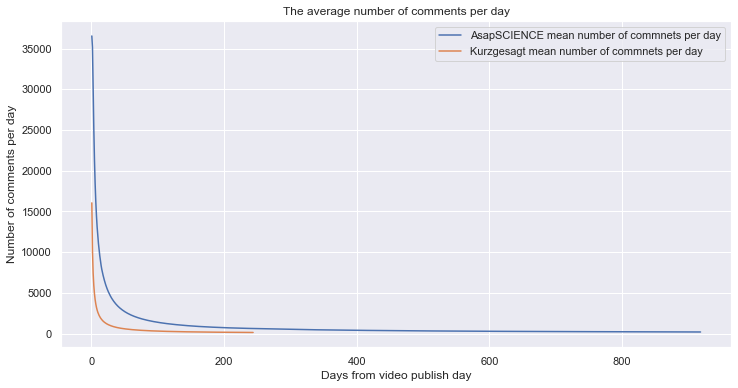

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(asap_ratio.keys(), asap_ratio.values(), label='AsapSCIENCE mean number of commnets per day')
plt.plot(kurz_ratio.keys(), kurz_ratio.values(), label='Kurzgesagt mean number of commnets per day')
plt.legend()
plt.xlabel('Days from video publish day')
plt.ylabel('Number of comments per day')
plt.title("The average number of comments per day");

Looking at the average number of comments per day we see that AsapSCIENCE's the most popular video has much more average comments in time. On the first day the number of comments was more than double the number of comments of Kurzgesagt's most popular video comments.

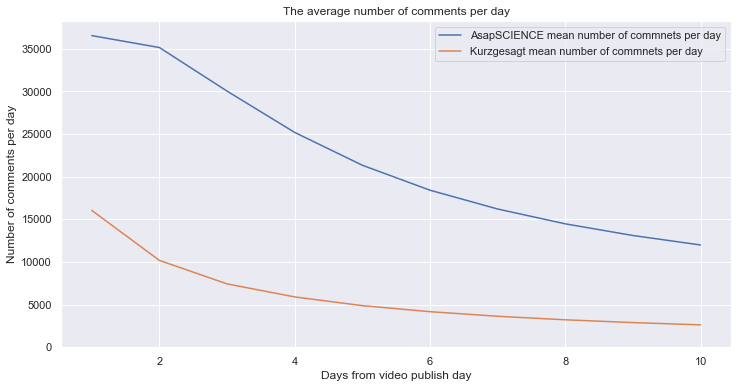

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(list(asap_ratio.keys())[:10], list(asap_ratio.values())[:10], label='AsapSCIENCE mean number of commnets per day')
plt.plot(list(kurz_ratio.keys())[:10], list(kurz_ratio.values())[:10], label='Kurzgesagt mean number of commnets per day')
plt.legend()
plt.xlabel('Days from video publish day')
plt.ylabel('Number of comments per day')
plt.title("The average number of comments per day")
plt.ylim(0);

We also see that the urge to leaving comments for Asap's video lasted longer - by the second day the average number of comments was very similar to the ratio one day after the publication, which is astonishing.
Kurzgesagt's ratio, on the other hand, droped significantly after the first day. thus we might conclude that Asap's video was so popular that it attracted people not subscribed to the chanel while Kurzgesagt video was mostly wached by people that are subscribed and received a notification.

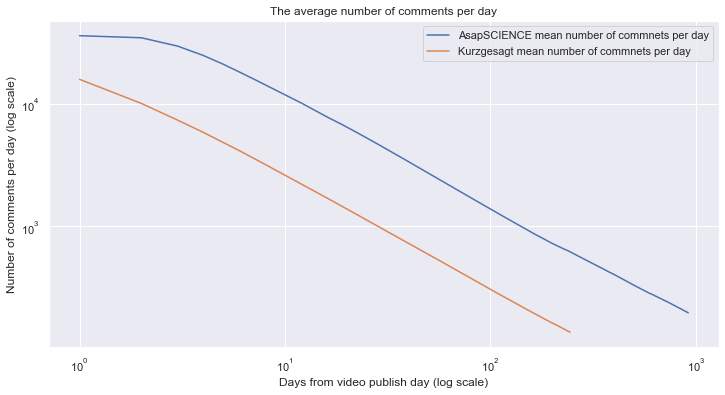

In [59]:
plt.figure(figsize=(12, 6))
plt.plot(asap_ratio.keys(), asap_ratio.values(), label='AsapSCIENCE mean number of commnets per day')
plt.plot(kurz_ratio.keys(), kurz_ratio.values(), label='Kurzgesagt mean number of commnets per day')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Days from video publish day (log scale)')
plt.ylabel('Number of comments per day (log scale)')
plt.title("The average number of comments per day");

Looking at the log-log plot we see interesting property of this ratio - namely, after several days from premiere, it exhibits power law.
$$
y = a t^k \rightarrow \log y = k \log t + \log a
$$
Furthermore, for both of the videos the slope (so the degree) of the relation is similar.
So we might state a thesis that every YouTube video comments exhibits such behavior but we will leave it as we are here only looking at 2 videos' comments which is rather small sample to verify it.

In [71]:
print(f"By calculating the slope of the line we can find the degree k (from the equation) - ASAP "
      f"{np.polyfit(np.log(list(asap_ratio.keys()))[4:], np.log(list(asap_ratio.values()))[4:], 1)[0]:.2f}"
      f" and Kurzgesagt {np.polyfit(np.log(list(kurz_ratio.keys()))[4:], np.log(list(kurz_ratio.values()))[4:], 1)[0]:.2f}")

By calculating the slope of the line we can find the degree k (from the equation) - ASAP -0.90 and Kurzgesagt -0.93


The degree is close to -1 so based on this we can suspect that this relation can be roughly modeled using function:
$$y \sim \frac{1}{x}$$

In [18]:
asap_data['days_from_publish'] = (asap_data['publish_date'] - asap_data['publish_date'].min()).dt.days
kurz_data['days_from_publish'] = (kurz_data['publish_date'] - kurz_data['publish_date'].min()).dt.days

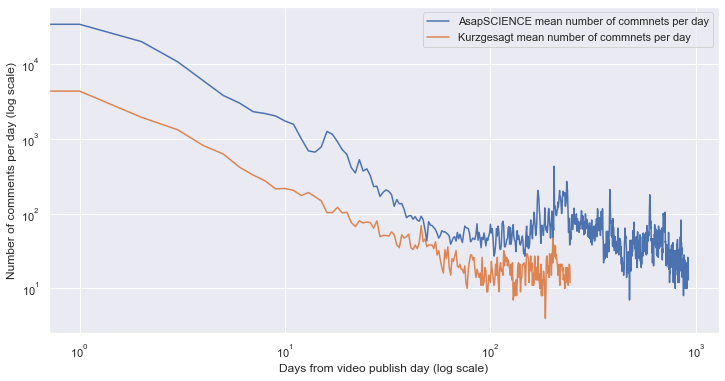

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(asap_data.groupby('days_from_publish').count()['comment'], label='AsapSCIENCE mean number of commnets per day')
plt.plot(kurz_data.groupby('days_from_publish').count()['comment'], label='Kurzgesagt mean number of commnets per day')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Days from video publish day (log scale)')
plt.ylabel('Number of comments per day (log scale)');

Looking at the number of comments in separate days (from video premiere) we get that AsapSCIENCE most popular video had more comments every single day. Thus not only the video was more popular but it aged much better, dispite the fact that Kurzgesagt made a video about still ongoing pandemic.

We can also compare viewers activity - calculate the ratio of number of comments, reactions (likes and dislikes) to number of views.

In [69]:
pd.DataFrame({
    'comments_per_view': [
        float(asap_channel_data['comment'] / asap_channel_data['views']),
        float(kurz_channel_data['comment'] / kurz_channel_data['views'])
    ],
    'reactions_per_view': [
        float((asap_channel_data['disliked'] + asap_channel_data['liked']) / asap_channel_data['views']),
        float((kurz_channel_data['disliked'] + kurz_channel_data['liked']) / kurz_channel_data['views'])
    ],
    'likes_per_view': [
        float(asap_channel_data['liked'] / asap_channel_data['views']),
        float(kurz_channel_data['liked'] / kurz_channel_data['views'])
    ],
    'dislikes_per_view': [
        float(asap_channel_data['disliked'] / asap_channel_data['views']),
        float(kurz_channel_data['disliked'] / kurz_channel_data['views'])
    ]
}, index=['AsapSCIENCE', 'Kurzgesagt']).style\
.background_gradient(cmap='RdYlGn', subset=['comments_per_view', 'reactions_per_view', 'likes_per_view'])\
.background_gradient(cmap='RdYlGn_r', subset=['dislikes_per_view'])

We can clearly see that Asap video was almost twice more often commented than the Kurzgesagt video.
This is probably the title of Asap's video encourages to leave a comment.
On the other hand, considering the reactions, we observe almost triple the reactions per view under Kurzgesagt's video and also more likes and less dislikes per view. 

## Spam analysis

### Ratio of lengths of the comments to number of words in the comments

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


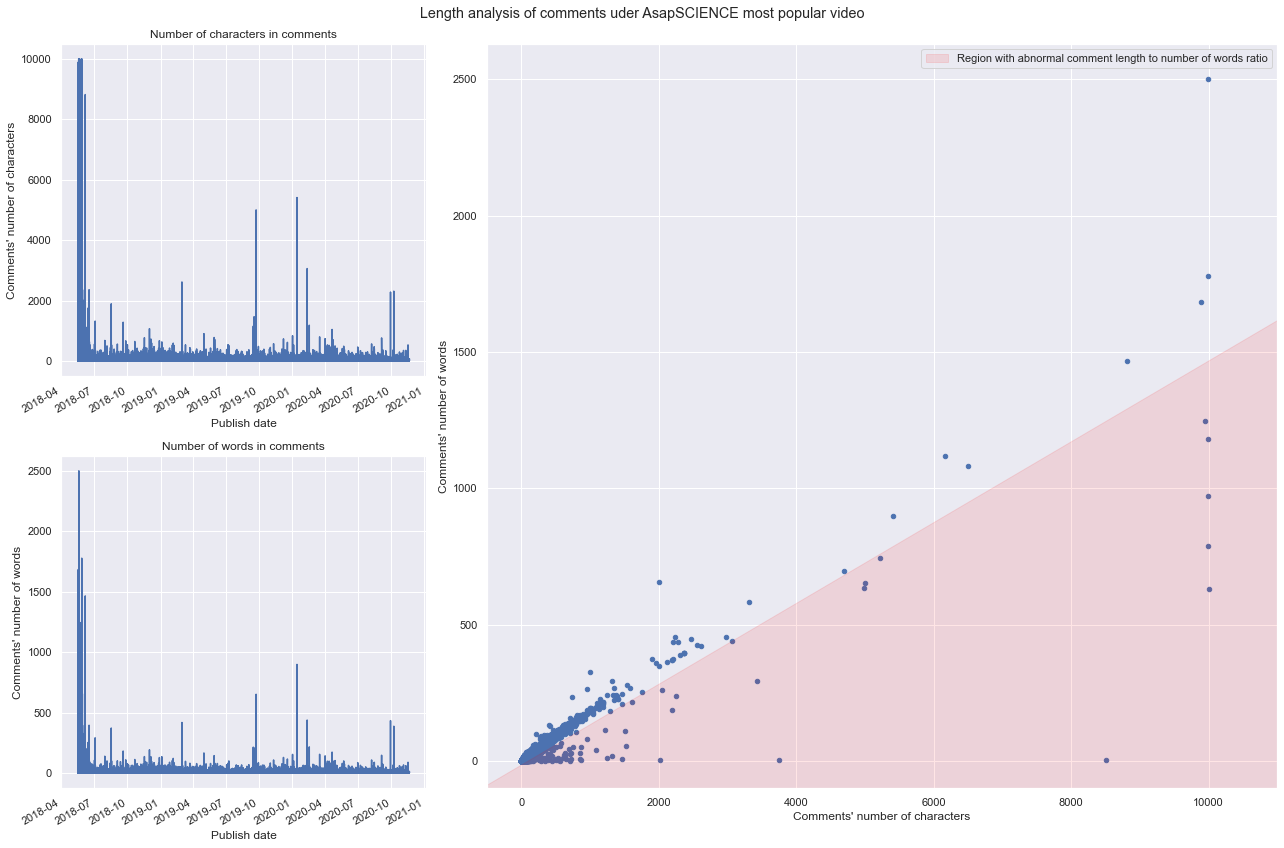

In [21]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3)

plt.subplot(gs[0, 0])
asap_data.set_index('publish_date').sort_index()['comment_len'].plot()
plt.title('Number of characters in comments')
plt.xlabel('Publish date')
plt.ylabel("Comments' number of characters")

plt.subplot(gs[1, 0])
asap_data.set_index('publish_date').sort_index()['comment_words_number'].plot()
plt.title('Number of words in comments')
plt.xlabel('Publish date')
plt.ylabel("Comments' number of words")

plt.subplot(gs[:, 1:])
asap_data[['comment_len', 'comment_words_number']].plot.scatter(x='comment_len', y='comment_words_number', ax=plt.gca())
x_tmp = np.arange(-500, asap_data['comment_len'].max()*1.1)
a_tmp, b_tmp = np.polyfit(*asap_data[['comment_len', 'comment_words_number']].values.T, 1)
std_tmp = np.std(asap_data['comment_words_number'] - a_tmp * asap_data['comment_len'] - b_tmp)

asap_spam_region = asap_data[asap_data['comment_words_number'] - (a_tmp * asap_data['comment_len'] - 2*std_tmp) < 0]

plt.fill_between(x_tmp, a_tmp * x_tmp - 2*std_tmp, -100, alpha=0.1, color='red', label="Region with abnormal comment length to number of words ratio")
plt.xlim(-500, asap_data['comment_len'].max()*1.1)
plt.ylim(-100)
plt.legend()
plt.xlabel("Comments' number of characters")
plt.ylabel("Comments' number of words")

plt.suptitle("Length analysis of comments uder AsapSCIENCE most popular video")
plt.tight_layout()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


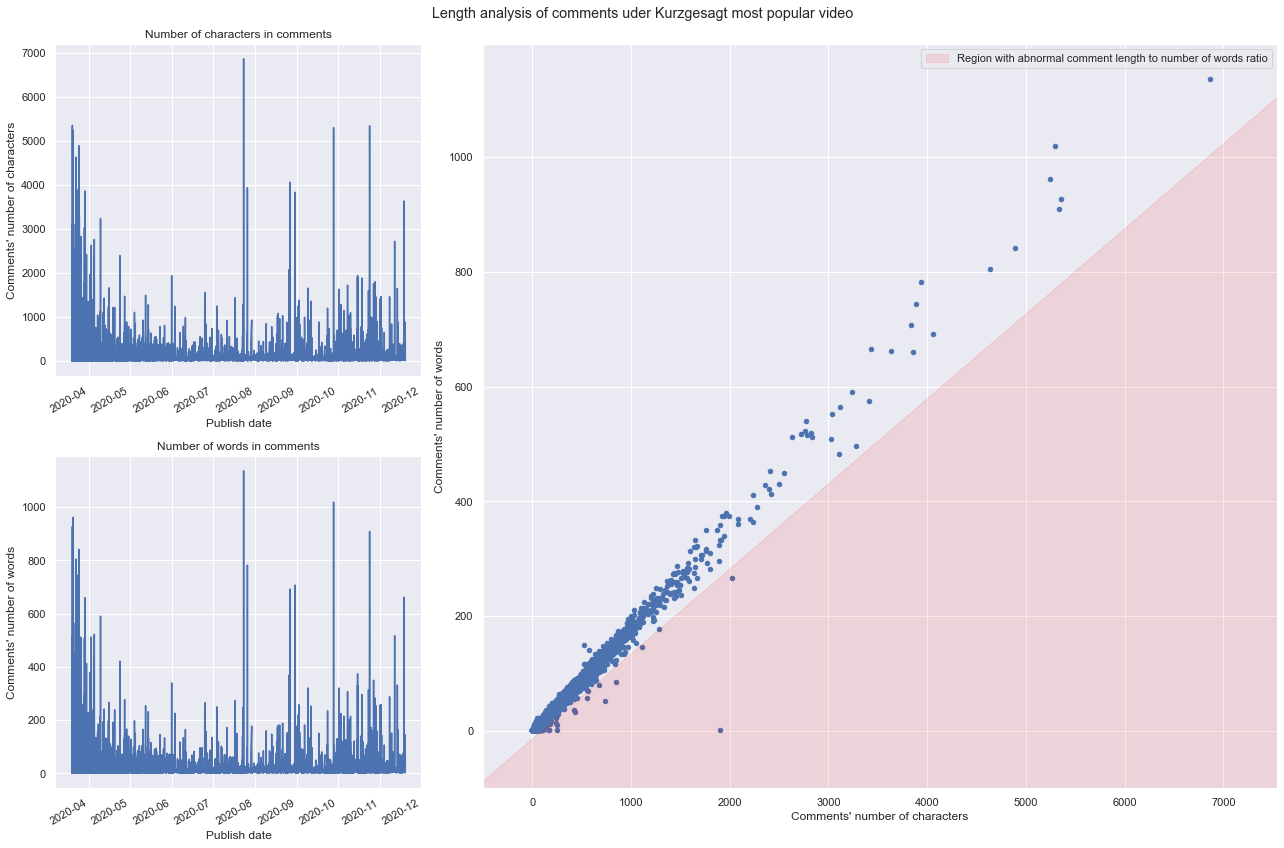

In [22]:
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 3)

plt.subplot(gs[0, 0])
kurz_data.set_index('publish_date').sort_index()['comment_len'].plot()
plt.title('Number of characters in comments')
plt.xlabel('Publish date')
plt.ylabel("Comments' number of characters")

plt.subplot(gs[1, 0])
kurz_data.set_index('publish_date').sort_index()['comment_words_number'].plot()
plt.title('Number of words in comments')
plt.xlabel('Publish date')
plt.ylabel("Comments' number of words")

plt.subplot(gs[:, 1:])
kurz_data[['comment_len', 'comment_words_number']].plot.scatter(x='comment_len', y='comment_words_number', ax=plt.gca())
x_tmp = np.arange(-500, kurz_data['comment_len'].max()*1.1)
a_tmp, b_tmp = np.polyfit(*asap_data[['comment_len', 'comment_words_number']].values.T, 1)
std_tmp = np.std(asap_data['comment_words_number'] - a_tmp * asap_data['comment_len'] - b_tmp)

kurz_spam_region = kurz_data[kurz_data['comment_words_number'] - (a_tmp * kurz_data['comment_len'] - 2*std_tmp) < 0]

plt.fill_between(x_tmp, a_tmp * x_tmp - 2*std_tmp, -100, alpha=0.1, color='red', label="Region with abnormal comment length to number of words ratio")
plt.xlim(-500, kurz_data['comment_len'].max()*1.1)
plt.ylim(-100)
plt.legend()
plt.xlabel("Comments' number of characters")
plt.ylabel("Comments' number of words")

plt.suptitle("Length analysis of comments uder Kurzgesagt most popular video")
plt.tight_layout()

We compare how does the length of the comment (chars) relates to number of words. We postulate that comments which are long and have small amount of words are spam. Let's see some examples:

In [23]:
for i in asap_spam_region['comment'].head(20).values:
    print(i)
    print()

https://www.google.com/amp/s/www.vox.com/platform/amp/2018/5/16/17358774/yanny-laurel-explained

yannyannyannyannyannyannyannyannynaaaaaaaaaaaaaaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH

Yannyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyhyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyyuy

https://m.soundcloud.com/lilkill-roy/scottie-pippen-feat-yung-irk-yungtrademark-prod-by-kujoisdead

lollollollollollollollollolllllllllooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo

http://mentalfloss.com/article/545157/beyond-yanny-laurel-other-aural-illusions-how-they-work  Meh...

WOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOW

YYYYYYYYYYYYYYYYYYYYAAAAAAAAAAAAAAAAAAAAAAAAANNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNYYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY

Laurel .......Laurel........Laurel....... LLLLLLLLAAAAAAAAAAAAUUUUUUUUUURRRRRRRRRRREEEEEEEEEEEEEELLLLLLLLLLLLLLL

yeyeyeyeyeyyeyeyeyeyeyyeyeeyyeetteeyyetetyeteyeyeeyeyeyeyyee

In [24]:
for i in kurz_spam_region['comment'].head(20).values:
    print(i)
    print()

這是我看過科普講解最清楚的影片，它條例式的解釋了很多關於當前疫情的情況…比如為什麼輕重差別這麼大、為何老年人跟本身患有慢性病者更容易變成重症、為何那麼多國家醫療資源都面臨崩潰，希望人們能早日渡過這次疫情

新型コロナが人の体内でどのように増殖するのかについて大変に勉強になりました。感染のピークを遅らせるというのは、日本政府の対策と同じ考え方ですね。今日はとてもお天気が良いですが、自宅で過ごします。PPAP！

日本の高校生です。 明後日には学校に行かなくてはいけません。未だにショッピングモールに出かけてる同級生がいます。私は電車で1時間半かけて学校へ行きます。このままでは学校で集団感染するでしょうね。助けて死にたくない

逆に言えばさ、一日中Youtube見ててもなにも言われないよなｗ     でも卒業式短縮、行事中止、外出禁止、、、、 日常に文句いってた頃が幸せだったなぁ、、、 一日中だらけてたかったけど、こんな形でだらけてたくなかった、、

Neutrophiles and Killer T Cells: *whistle*       UUUUUUUUUUURAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

精度の高い字幕のおかげで、英語を解しない私でも内容を理解出来ました。 ありがとう。 この動画を世界各地で見て欲しいと願います。 及ばずながら、ツイート等させてもらいました。  ホント、手を洗え、です。 （中年期以上の日本人は、学校教育の場で手洗いの大切さや手法を叩き込まれたものです）

我分享了所有我知道的关于新冠病毒的常识，包括传播途径、预防方法、新冠病毒的特殊性—强感染性。希望每个普通人都能保护好自己，然后评论不见了！呵呵。评论里还有fuck China的，中国为了防控病毒付出了多少代价，钱、命，这些人是眼瞎还是弱智，章口就来。bye bye👋🏻 中国人不欠任何人的，还是相忘于江湖吧

コロナ、怖いですね...私が住んでいる福井にも田舎なのに30人越え...オマケに京都からの観光も来てたらしく、増えていくばかり。私の家の近くでも、感染者が出たという噂が絶えません。とても怖いです。私は今、英語の勉強をしています。難しいです（笑)皆さんがコロナに感染者しない

We see that most of the exemplary comments are 'spamish'. However among the spam comments we see some Asian comments considered as spam. However this is English channel so who is going to bother to translate it anyway.

In [25]:
print(f"Using this method we recognized as spam only {asap_spam_region.shape[0] / asap_data.shape[0] * 100:.4f}% ({asap_spam_region.shape[0]} / {asap_data.shape[0]}) in Asap"
      f" and {kurz_spam_region.shape[0] / kurz_data.shape[0] * 100:.4f}% ({kurz_spam_region.shape[0]} / {kurz_data.shape[0]}) in Kurzgesagt")

Using this method we recognized as spam only 0.0589% (106 / 180079) in Asap and 0.0722% (24 / 33236) in Kurzgesagt


### Word frequency

Looking at some random sample of comments from Asap we encountered many coments repeating `Yanny` or `Laurel`, which, although answers the video's title question, it could have been aswered by simple `Yanny`.

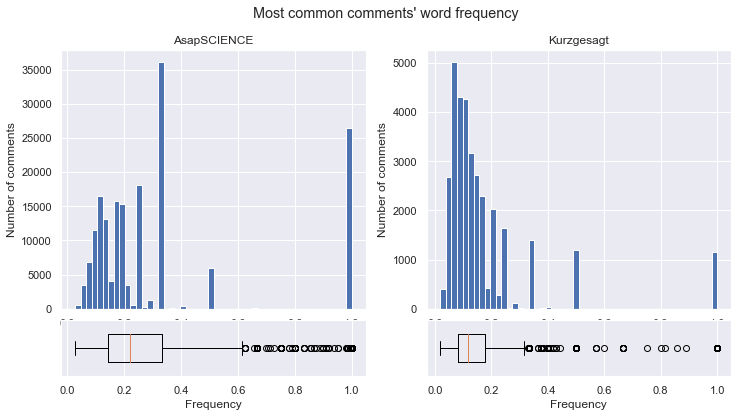

In [117]:
fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(5, 2)

plt.subplot(gs[:4, 0])
asap_data['comment_words_frequency'].hist(bins=50)
plt.title('AsapSCIENCE')
plt.ylabel('Number of comments')

plt.subplot(gs[4, 0], sharex=plt.gca())
plt.boxplot(asap_data['comment_words_frequency'], vert=False, widths=0.5)
plt.xlabel('Frequency')
plt.yticks([])

plt.subplot(gs[:4, 1])
kurz_data['comment_words_frequency'].hist(bins=50)
plt.title('Kurzgesagt')
plt.xlabel('Frequency')
plt.ylabel('Number of comments')

plt.subplot(gs[4, 1], sharex=plt.gca())
kurz_box = plt.boxplot(kurz_data['comment_words_frequency'], vert=False, widths=0.5)
plt.xlabel('Frequency')
plt.yticks([])

plt.suptitle('Most common comments\' word frequency');

We see extreme differences in the histograms and boxplots. The comments' most common word frequency under Kurzgesagt video is much less dispersed. It is probably because as the topic of pandemic is more patetic thus comments will be more adult (not like `YEEENNNNYYYY`). Using the comaprison we see how much more common is to repeat the same word under Asap video than under Kurzgesagt. Thus, because of the more normal behavior of Kurzgesagt commentator we will pick the threshold using the boxplot for their comments' data. As we would like to identify abnormal comments we will pick the threshold to be the upper whisker:

In [146]:
kurz_box['whiskers'][1].get_data()[0][1]

0.3157894736842105

To avoid the situation when comment has only 3 words which differ from each other we will increase the threshold to 0.34.

In [151]:
spam_freq_thr = 0.34

Thus, we will use this threshold. Hovewer, we need an extra condition, namely that the number of words in the comment is larger than 2, as those comments will always have this ratio on over 0.34 (`Yenny` is considered as not spam), although it must have at least 4 letters (misspelled `Yenny` ~ `Yeny` should not be counted as spam).

In [152]:
asap_data['freq_spam'] = ((asap_data['comment_words_frequency'] > spam_freq_thr) & (asap_data['comment_words_number'] > 2)) | ((asap_data['comment_words_number'] <= 2) & (asap_data['comment_len'] < 4))
kurz_data['freq_spam'] = ((kurz_data['comment_words_frequency'] > spam_freq_thr) & (kurz_data['comment_words_number'] > 2)) | ((kurz_data['comment_words_number'] <= 2) & (kurz_data['comment_len'] < 4))

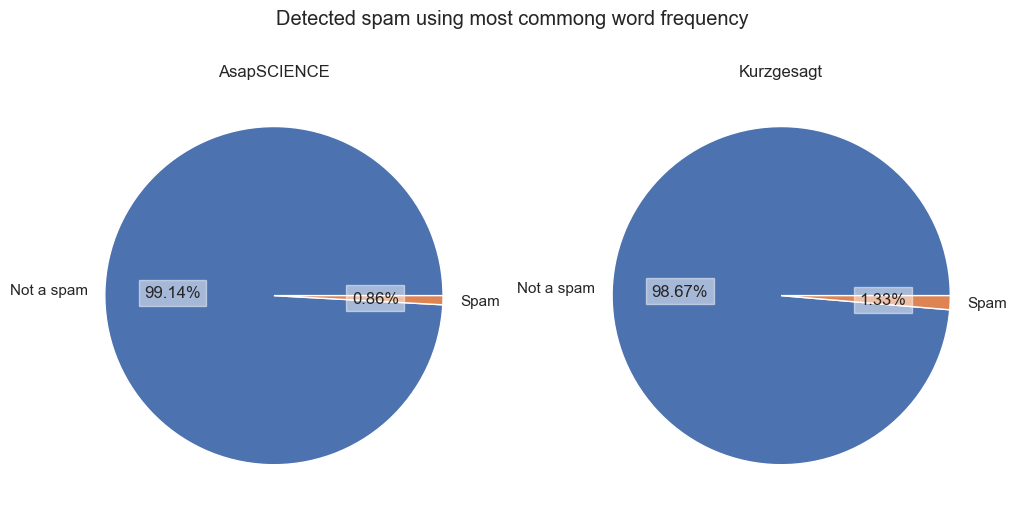

In [153]:
plt.figure(figsize=(12, 6), dpi=100)

plt.subplot(1, 2, 1)
plt.pie(asap_data['freq_spam'].value_counts().sort_index(), labels=['Not a spam', 'Spam'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie(kurz_data['freq_spam'].value_counts().sort_index(), labels=['Not a spam', 'Spam'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("Kurzgesagt")

plt.suptitle("Detected spam using most commong word frequency");

We see that there is small percentage of repetitive comments on both channels.

In [161]:
for i in kurz_data[kurz_data['freq_spam']]['comment'].sample(20).values:
    print(i)
    print()

💗

❤❤❤

👍

Coronavirgin vs Chadbola vs ThAIDS vs Spanish Lad vs Gad death

Plandemic, nothing more, nothing less.

Gi

Share share share ❤️

Fighting the corona with corona

👍

Wow

💯

Hi

Hi

..

i dont think i care

I have corona na na na na

…

SHARE - SHARE - SHARE!

01000011 01101111 01110010 01101111 01101110 01100001 00100000 01101101 01110101 01110011 01101001 01100011 00100000 01110011 01110100 01100001 01110010 01110100 01110011 00100000 01110000 01101100 01100001 01111001 01101001 01101110 01100111 00100000

Thx



Looking at the sample comments we see that the method picks finely spam comments.

### Classification model

We also decided to use the dataset available on [kaggle](https://www.kaggle.com/goneee/youtube-spam-classifiedcomments) to train classification model (in folder spam detection). The prediction results are surprising:

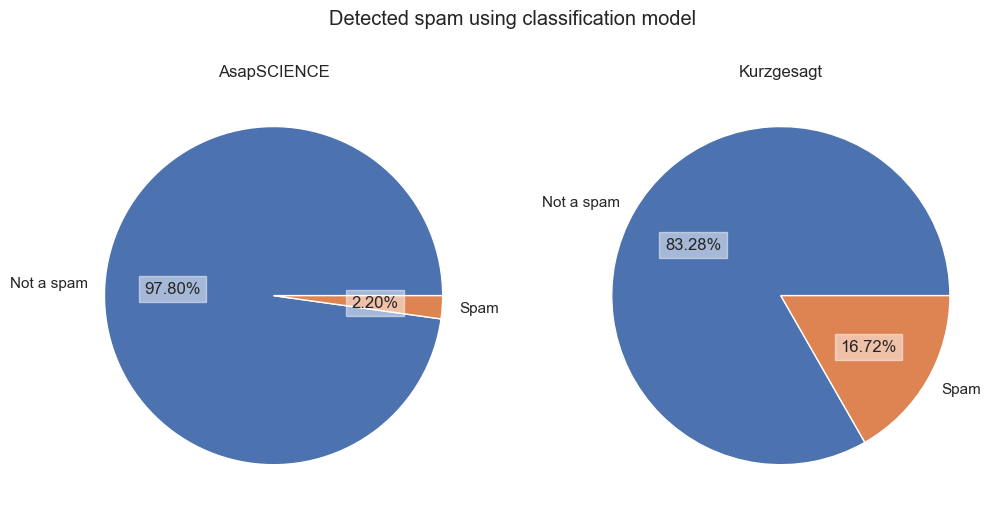

In [141]:
plt.figure(figsize=(12, 6), dpi=100)

plt.subplot(1, 2, 1)
plt.pie(asap_data['spam'].value_counts().sort_index(), labels=['Not a spam', 'Spam'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie(kurz_data['spam'].value_counts().sort_index(), labels=['Not a spam', 'Spam'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("Kurzgesagt")

plt.suptitle("Detected spam using classification model");

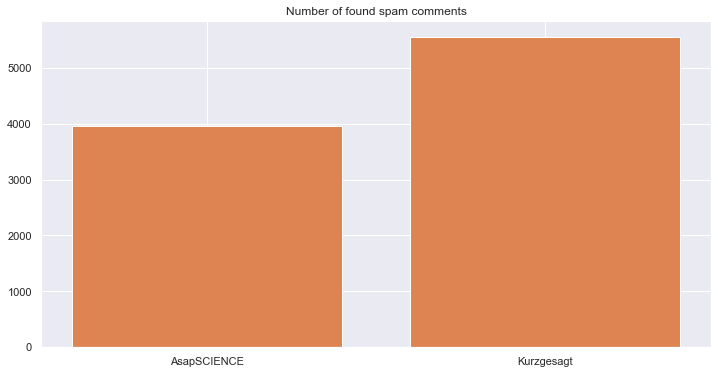

In [170]:
plt.figure(figsize=(12, 6))

plt.bar(['AsapSCIENCE', 'Kurzgesagt'],
        [asap_data[asap_data['spam'] == 1].shape[0],
         kurz_data[kurz_data['spam'] == 1].shape[0]], color=sns.color_palette()[1])
plt.title("Number of found spam comments");

There is significantly larger percent of comments that are considered as spam in Kurzgesagt comments. 
Furthermore, even though AsapSCIENCE's video has much more comments, it has less comments considered as spam compared to Kurzgesagt.

In [28]:
pd.concat((asap_data[['comment_words_number']].rename(columns={'comment_words_number': 'AsapSCIENCE_comments'}).describe(),
           kurz_data[['comment_words_number']].rename(columns={'comment_words_number': 'Kurzgesagt_comments'}).describe()), axis=1)

AsapSCIENCE_comments  Kurzgesagt_comments
count         180079.000000         33236.000000
mean               8.630806            19.116019
std               16.309745            33.096432
min                1.000000             1.000000
25%                3.000000             6.000000
50%                5.000000            11.000000
75%               11.000000            20.000000
max             2500.000000          1136.000000

In [29]:
asap_data[asap_data['comment_words_number'] < 4].sample(20)[['comment']]

comment
33233                   1:52 Laurel
49271                 I Heard Yally
17931                        Laurel
38622                  I hear yammi
30353                   I hear yaoi
97303  https://youtu.be/EMiOS1Kwdtk
71296             I here BOTH......
9982                          Yanni
3212                          Yanny
15252                        Hannah
29353                   I hear both
38702                  I hear wally
57488                I heated Yalmy
42520                  I hear yummy
32919                   I hear yuri
23398                       Yanny??
35955                   I WAS RIGHT
16762                        Laurel
4200                          Yanny
2916                          Yanny

It is mainly because more than 25% of comments consist not more than 3 words. Looking at the sample of comments we clearly see that among those comments are mostly "I hear Yanny", "Yanny", "Laurel" and our classification method is not sensitive for that kind of spam. Also it depends on if we should consider those comments as spam as authors of the video ask `Do You Hear "Yanny" or "Laurel"?` so those might be considered as answers to this question. The video from Kurzgesagt talks about COVID-19 so it seems logical that people are willing to write more text, either to contradict the existence of the virus, or about the toilet paper panic, etc. There are many controversies about it and many people might be eager to write to world about what are their thought about this.

### Keywords based method
For those reasons we propose also a method to find spam using keywords - looking for comments that are related to the topic of a video:
- Kurzgesagt's video is about coronavirus so the keywords can be: `corona`, `virus`, `covid`, `sars`, `pandemi`, `quarantin`, `mask`, `cough`, `ill`, `distanc`, `infect`, `immun`, `drug`, `vaccin`, `chin`, `hygien`, `hand`, `wash`, `test`, `lock`, `toilet`, `paper`, `stay.{,10}home`, `outbreak`;
- AsapSCIENCE's keywords can be: `hear`, `yanny`, `laurel`

In [162]:
asap_match_pattern = "hear|yanny|laurel"
kurz_match_pattern = "corona|virus|covid|sars|pandemi|quarantin|mas|cough|ill|distanc|infect|immun|drug|vaccin|chin|hygien|hand|wash|test|lock|toilet|paper|stay.{,10}home|outbreak"

Text(0.5, 0.98, "Percentage of comments on video's topic and not on topic")

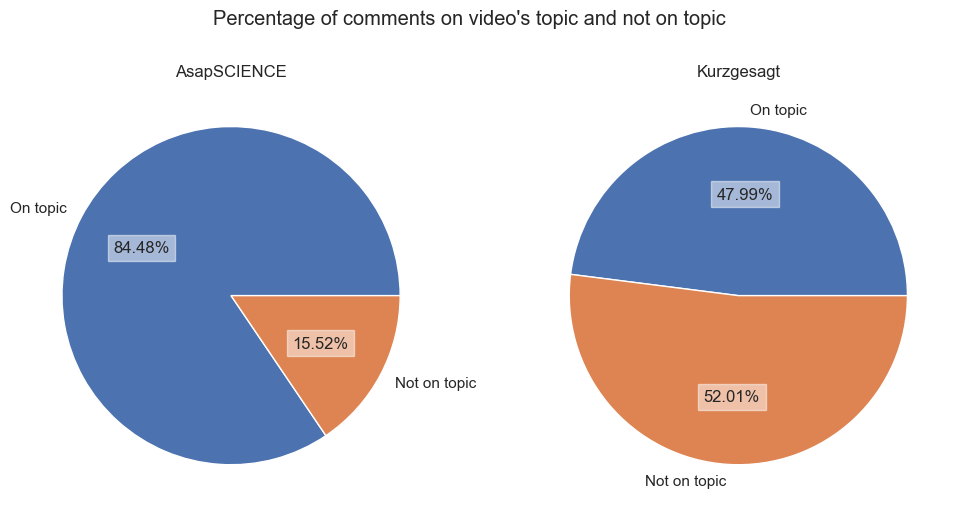

In [31]:
plt.figure(figsize=(12, 6), dpi=100)

plt.subplot(1, 2, 1)
plt.pie(asap_data['comment_processed'].str.lower().str.contains(asap_match_pattern).value_counts().sort_index()[::-1], labels=['On topic', 'Not on topic'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie(kurz_data['comment_processed'].str.lower().str.contains(kurz_match_pattern).value_counts().sort_index()[::-1], labels=['On topic', 'Not on topic'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("Kurzgesagt")

plt.suptitle("Percentage of comments on video's topic and not on topic")

Exemplary Kurzgezagt not on topic comments:

In [32]:
for i in kurz_data[~kurz_data['comment_processed'].str.lower().str.contains(kurz_match_pattern)]['comment_processed'].sample(20).values:
    print(i)
    print()

“...as if you’ve cut up some jalapeños and want <number> put in ur contacts next” Me: bruh

The bird is licking the window do he get it

[another meme comment] *_Remember, kids._* *_Just say no, the germs can't enter your body without your consent._*

This video is so aesthetically pleasing

Commenting to tell the algorithm I like this and I want more people to see this.

awesome job guys you're the best

Jih tiču

Omg some actual useful and actual calming information... wow...

This hell for me

This is monetised?

such a good video

...

Все в наших руках!

waiting for new video

Great video! Thank you!

And it all started from a man deciding to EAT a bat

i guess this means humans should consume soap.

This is deep.

Everyone can finally relax... Kurzgesagt is here to explain how to stop this... PHEW!

Share share share this one!! Thanks for making it.



The percentage of comments not on topic and adding something to the conversation under Kurzgesagt is significant. As under AsapSCIENCE the number of comment answering the title question is tremendous, under Kurzgesagt there is more comments thanking for the video (`Thank you 🙏`, `glad that oh such videos that help to clarify the situation.`) or comment that is not related (`Oh, and stop eating bats.`). However it is probably because of the hard topic that Kurzgesagt is talking about in the video, unlike in the Asap's video.

## Summary

To summarize all of the approaches we will calculate the percent of the comments that were considered as spam by any of the proposed approaches.

In [173]:
asap_spam_percent = (asap_data.index.isin(asap_spam_region.index) | asap_data['freq_spam'] | (asap_data['spam'] == 1) | (~asap_data['comment_processed'].str.lower().str.contains(asap_match_pattern)))
kurz_spam_percent = (kurz_data.index.isin(kurz_spam_region.index) | kurz_data['freq_spam'] | (kurz_data['spam'] == 1) | (~kurz_data['comment_processed'].str.lower().str.contains(kurz_match_pattern)))

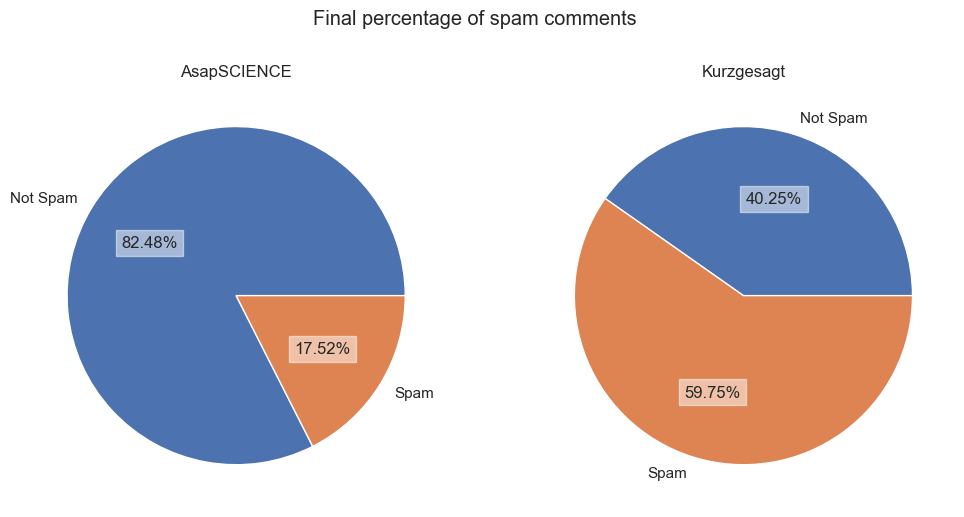

In [203]:
plt.figure(figsize=(12, 6), dpi=100)

plt.subplot(1, 2, 1)
plt.pie([1-asap_spam_percent.mean(), asap_spam_percent.mean()], labels=['Not Spam', 'Spam'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie([1-kurz_spam_percent.mean(), kurz_spam_percent.mean()], labels=['Not Spam', 'Spam'], autopct='%.2f%%',
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.5)})
plt.title("Kurzgesagt")

plt.suptitle("Final percentage of spam comments");

In [202]:
print(f"""We see tremendous difference in percent of spam comments, however the number is larger for AsapSCIENCE comments ({asap_spam_percent.sum()} vs {kurz_spam_percent.sum()}).""")

We see tremendous difference in percent of spam comments, however the number is larger for AsapSCIENCE comments (31551 vs 19858).


Still, although the number of spam comments is larger, the percent is more important as it statest that majority of comments on Kurzgesagt most popular channel is spam. 

## Emotions

In [36]:
 emotion_color_map = dict(zip(['sadness', 'anger', 'fear', 'surprise', 'joy', 'love'], ['gray', 'r', 'navy', 'cornflowerblue', 'gold', 'crimson']))

Text(0.5, 0.98, 'Emotions in the comments')

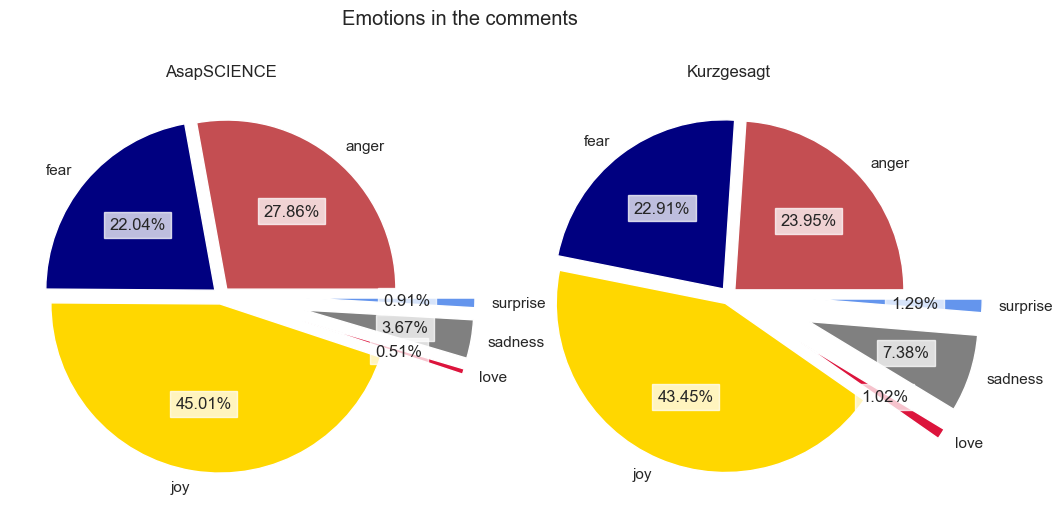

In [37]:
plt.figure(figsize=(12, 6), dpi=100)

emotion_labels = sorted(asap_data['emotion'].unique())

plt.subplot(1, 2, 1)
plt.pie(asap_data['emotion'].value_counts().sort_index(),
        labels=emotion_labels, colors=map(emotion_color_map.get, emotion_labels),
        autopct='%.2f%%', explode=[0.05, 0.05, 0.05, 0.5, 0.5, 0.5],
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.75)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie(kurz_data['emotion'].value_counts().sort_index(),
        labels=emotion_labels, colors=map(emotion_color_map.get, emotion_labels),
        autopct='%.2f%%', explode=[0.05, 0.05, 0.05, 0.5, 0.5, 0.5],
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.75)})
plt.title("Kurzgesagt")

plt.suptitle("Emotions in the comments")

In [38]:
for i in asap_data[asap_data['anger'] == 1].sample(10)['comment']:
    print(i)
    print()

At the beginning of this video i heard laurel but now I'm back to yanny

I some times hear one but some times i hear the other

I hir yanny

wtf i dont hear eather of them

plebism

Even pitched down I don’t hear Yanny, I hear ‘Yeah-Re’ or something

If you move your lips like yanny you hear yanny but move them laurel you will hear yanny

umm am i supposed to hear both at the same time 0-0

There is no way people hear yanny. Its obviously saying laurel just slow down the video

When its slower i hear lereny lereny



In [39]:
for i in kurz_data[kurz_data['anger'] == 1].sample(10)['comment']:
    print(i)
    print()

Okay. That's a lot more dangerous than I thought

I remember a month before the outbreak in California... ESPECIALLY THE GUYS. when I would use the restroom and come out to watch my hands some guys would literally skip the sink and walk straight out of the restroom. fucking gross ass people.

Why dose the U.S. look twice as big on there map and Canada look half the size? 7:18

Toilet paper xD

Protein printer go Brrrrrrr

0:27 the monkey is eating toilet paper :D

I remember being in a Walmart a few weeks ago and I saw a worker putting clothes away. She legit sneezed in her hand, wiped it on her pants, then proceeded putting clothes away.

Blood cells at work the anime really do be explaining this stuff to me

São Paulo is chaotic now!! Take care, everyone! Don’t leave your houses!

Kurzgesagt se puso la nueve.



We see that the percentage of emotions is similar for both videos. With major difference in the ammount of comments full of sadness and anger. Comapring the angry comments we see that in Asap's video is more of confusion of not hearing either Laurel and Yanny or hearing both which is quite calm anger. However in Kurzgesagt case there are some very angry comments like `f*** china 😡😡😡` and less angry like commenting the current situation `Good news: China are now starting to take control of the virus. Bad news: it is starting to get worse in italy`. 

In [40]:
for i in asap_data[asap_data['sadness'] == 1].sample(10)['comment']:
    print(i)
    print()

I hear Laurel. Now I feel old... Atleast my ears feel old

So... I'm hearing Laurel, does it mean that I'm old?

I mean who really cares what you hear? It doesn't change anything

I can just hear YANNY and cant understand why people hear ”Laurel”. But maybe its because im Swedish and only used to hearing pretty stereotypical kinds of english?

I hear it but it is not pronounced how he says it

Ha i know im not old or my ears aint either feelbad for people with old ears

I tried my best but I just can't hear it as yanny

So old guys hear it right , young ears are dumb?

If the sound is muted, and no one is there to hear it, does it still make a sound like Laurel or Yanny?😅

If you hear Lanny or Yanel or something, don't feel dumb. My mom said she heard Gary. Idek how but she did apparently. But down 30% I heard Yanny at a low voice, and up 30% I heard Yanny at a super high pitched voice. Sooo is something wrong with my ears?



In [41]:
for i in kurz_data[kurz_data['sadness'] == 1].sample(10)['comment']:
    print(i)
    print()

You'll only die, if you don't have toilet paper.

In the USA it's the States job to set in place response. But the buck lays with our President who I don't like or hate. There shouldn't be a blank response for all of the USA each state differs.

Coronavirus: Exists Humanity: Loses their minds

When you analyze the data especially the rate at which it’s spreading and take into account all the stupid people who think this is just a flu we are doomed. It’s amazing how we have examples to look at and we don’t heed the warnings. Italy is going to hell in a hand basket. They have a better healthcare system and only 62 million people. We are far larger at 330 million plus another 20 million or so for all the illegals so roughly 350 million peeps. We are not even close to the peak and the number of infected today has quadrupled from just 1 week ago. People are going to be in shock and wished they took this more seriously. This next week.

1500 down votes?

Goodbye everybody

In the UK, our sch

As for the sadness case we have that:
- in Kurzgesagt we see comments that are about death, like `I Have Probably Been Corona Virus in The Start Now Am I Gonna Die? :(`
- in AsapSCIENCE about being old and not being able to hear well `I'm 115 years old, and I can't hear s***.`, `I hear laurel i have old ears`

so the reasons for being sad are different - sadness because of possible death vs sadness because of being old and not being able to hear well.

## Sentiment

In [45]:
 sentiment_color_map = dict(zip(['NEGATIVE', 'POSITIVE'], ['red', 'green']))

Text(0.5, 0.98, 'Sentiments in the comments')

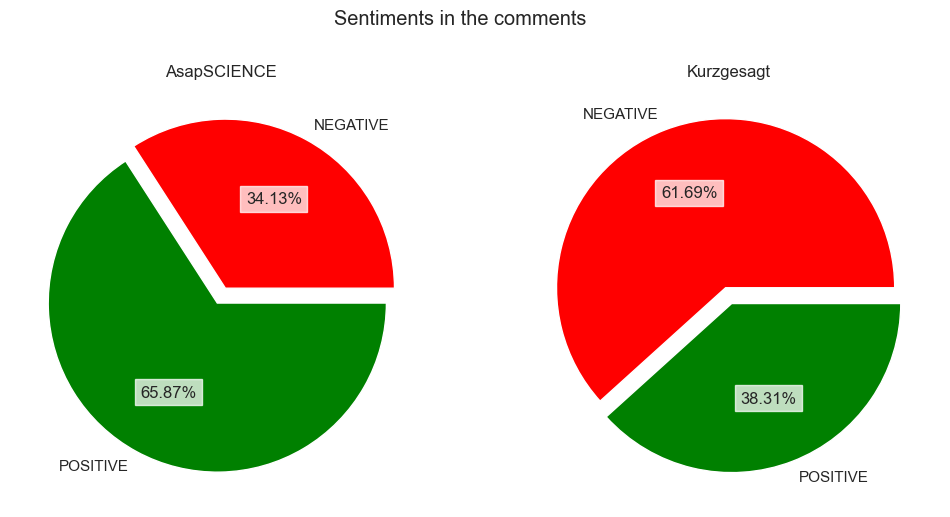

In [48]:
plt.figure(figsize=(12, 6), dpi=100)

sentiment_labels = sorted(asap_data['sentiment_label'].unique())

plt.subplot(1, 2, 1)
plt.pie(asap_data['sentiment_label'].value_counts().sort_index(),
        labels=sentiment_labels, colors=map(sentiment_color_map.get, sentiment_labels),
        autopct='%.2f%%', explode=[0.05, 0.05],
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.75)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie(kurz_data['sentiment_label'].value_counts().sort_index(),
        labels=sentiment_labels, colors=map(sentiment_color_map.get, sentiment_labels),
        autopct='%.2f%%', explode=[0.05, 0.05],
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.75)})
plt.title("Kurzgesagt")

plt.suptitle("Sentiments in the comments")

There is significant difference visible in the sentiment of the comments. While most comments under Asap's video are positive it is the opposite for the Kurzgesagt video.
While, the anger that can be seen in AsapSCIENCE's video is probably for when someone didn't hear the name right, the Kurzgesagt video moves the topic of COVID-19 so there might be many reasons for the anger. Either staying at home, unable to buy toilet paper as it is sell-out or because there are some people that don't believe in the pandemic. Thus, such difference was expected.

## Entailment

In [51]:
 entailment_color_map = dict(zip(['CONTRADICTION', 'ENTAILMENT', 'NEUTRAL'], ['red', 'green', 'yellow']))

Text(0.5, 0.98, 'entailments in the comments')

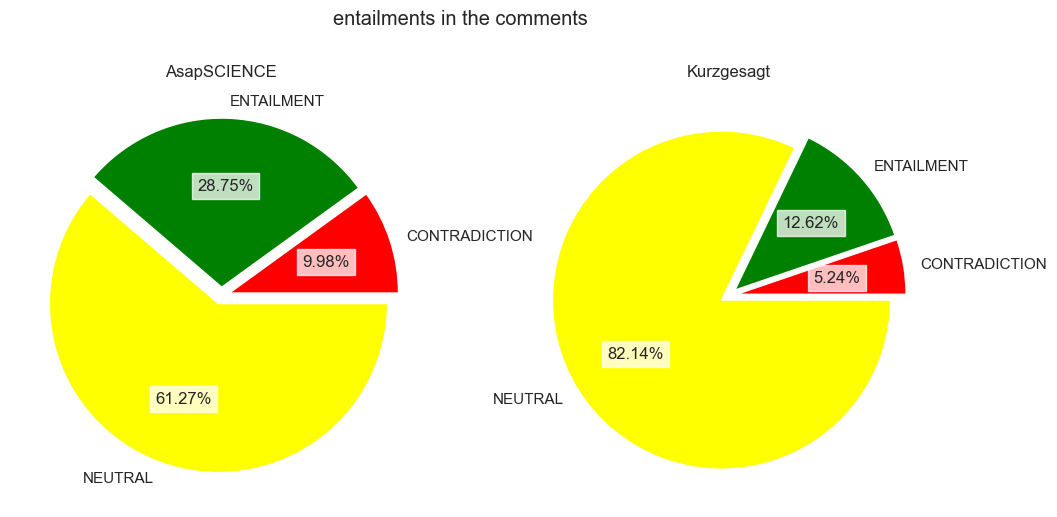

In [53]:
plt.figure(figsize=(12, 6), dpi=100)

entailment_labels = sorted(asap_data['entailment_label'].unique())

plt.subplot(1, 2, 1)
plt.pie(asap_data['entailment_label'].value_counts().sort_index(),
        labels=entailment_labels, colors=map(entailment_color_map.get, entailment_labels),
        autopct='%.2f%%', explode=[0.05, 0.05, 0.05],
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.75)})
plt.title("AsapSCIENCE")

plt.subplot(1, 2, 2)
plt.pie(kurz_data['entailment_label'].value_counts().sort_index(),
        labels=entailment_labels, colors=map(entailment_color_map.get, entailment_labels),
        autopct='%.2f%%', explode=[0.05, 0.05, 0.05],
        textprops={'backgroundcolor': (1.0, 1.0, 1.0, 0.75)})
plt.title("Kurzgesagt")

plt.suptitle("entailments in the comments")

In [212]:
for i in asap_data[asap_data['entailment_label'] == 'ENTAILMENT'].sample(10)['comment']:
    print(i)
    print()

I hear both

I hear yanny

Laurel

I hear both

Yanny!!!

Its laurel

I hear both

I hear both

I here both

I hear yanny



We see that that comments under both videos mostly are neutral. We observe that there is more logical comments under AsapSCIENCE video compared to Kurzgesagt's. Digging deeper we get that the logical comments are `I hear yanny` so indeed they are entailed. The more surprising fact is that under Kurzgesagt is such small number of entailed comments as the topic is patetic we expected for comments to be thought out however probably due to the emotions associated with the pandemic could degrede the quality of the comments.

## Polarity and Subjectivity

In [10]:
def quantile(q):
    def quantile_(x):
        return np.quantile(x, q)
    quantile_.__name__ = f'q{q:0.2f}'
    return quantile_

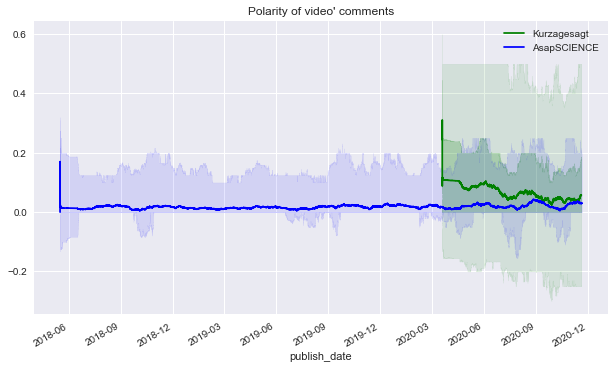

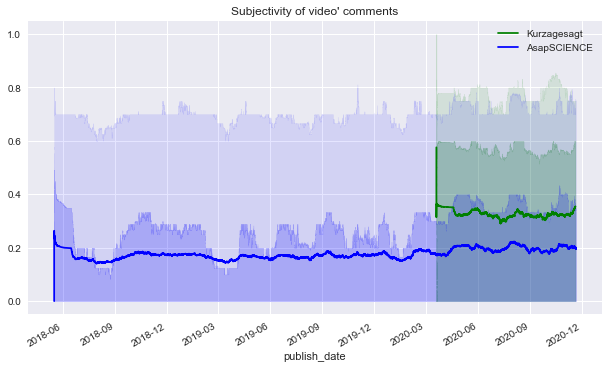

In [11]:
for i, j in [('polarity', 'Polarity'), ('subjectivity', 'Subjectivity')]:
    plt.figure(figsize=(16, 6))
    grid = plt.GridSpec(1, 3, wspace=0.25)
    plt.subplot(grid[0, :2])
    tmp = kurz_data.groupby('publish_date')[i].mean().rolling('30d').agg(
        ['mean', quantile(0.1), quantile(0.25), quantile(0.75), quantile(0.9)])
    tmp['mean'].plot(label='Kurzagesagt', color='green')
    plt.fill_between(tmp.index, tmp['q0.10'], tmp['q0.90'], color='green', alpha=0.1)
    plt.fill_between(tmp.index, tmp['q0.25'], tmp['q0.75'], color='green', alpha=0.2)

    tmp = asap_data.groupby('publish_date')[i].mean().rolling('30d').agg(
        ['mean', quantile(0.1), quantile(0.25), quantile(0.75), quantile(0.9)])
    tmp['mean'].plot(label='AsapSCIENCE', color='blue')
    plt.fill_between(tmp.index, tmp['q0.10'], tmp['q0.90'], color='blue', alpha=0.1)
    plt.fill_between(tmp.index, tmp['q0.25'], tmp['q0.75'], color='blue', alpha=0.2)

    y_lim = plt.ylim()
    plt.legend()
    plt.title(f"{j} of video' comments")

    plt.show()

Plots present polarity and subjectivity of video comments. By line the mean is marked and the areas are q25-q75 quantile interval (darker) and q10-q90 quantile interval (lighter). The polarity and subjectivity are given by:

- polarity - a number between -1 and 1 where -1 means a comment is with negative sentiment and 1 positive. Thus 0 means that comment is neutral;
- subjectivity - a number between 0 and 1 where 0 means that a comment presents facts and 1 it's an opinion.

We can see that polarity for both video comments positive. In the case of AsapSCIENCE video we can see that polarity remains at the same low level from the begining until now. It can be caused by that video is not really scientific and it deviates from the standard channel content. On the other hand we have a Kurzgesagt video. We can see that polarity is higher than in first discussed video but it declining in time. It can be caused by that in time people are more annoyed about pandemic situation so they want to discharge frustration somewhere and for them comment section is good pleace to do it.

It was quite unexpected for us that subjectivity for AsapSCIENCE video is that low. We expected that it will be much higher because the topic of the video suggest that people will share with their feeling what they heard. The reason of that subjectivity is that low could be that there are a lot of comments like "I hear Yanny" etc. Algorithm classified it as something neutral and from that we received that low level of subjectivity in comments. Subjectivity is higher in the Kurzgesagt video comment. It is because film discuss coronavirus and pandemic problem. We know that people are upset because of situation on the world. They want to share with their opinion and write more elaborate statements.

# Conclusions

During the analysis we have found several interesting conclusions.
The most popular videos of two chosen channels are significantly different in both number of views, comments, reactions even though the general topic of those channels is similar (popular science).
All methods that were used to find spam indicated larger percent of comments under Kurzgesagt's video compared to the AsapSCIENCE video's comments.
The emotions in comments were similar with some differences in the amount of anger and sadnes.
The sentiments in the comments for those videos are almost the oposite - in the Asap video there is similar percent of comments that are positive to the percent of comments that are negative in Kurzgesagt video.
We also saw significant differences in the polarity and subjective among those videos' comments.
Furthermore, we observed interesting fact is that the comments exhibit interesting power law that can be used to model the videos' comments sections lengevity.